<a href="https://colab.research.google.com/github/rafaellccouto/pos_tech_dengue/blob/main/postech_aula_dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postech: Análise de dados da Dengue de 2013 a 2023

In [1]:
#Analise dados Dengue
#Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np
#Bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#Base de dados
df_dengue = pd.read_excel('Base de Dados Dengue.xlsx')

In [3]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3


In [4]:
df_dengue.tail()

,municipio,uf,data_infeccoes,qtd_infeccoes
728767,BRASILIA,DF,2023-08-01,939
728768,BRASILIA,DF,2023-09-01,843
728769,BRASILIA,DF,2023-10-01,686
728770,BRASILIA,DF,2023-11-01,1300
728771,BRASILIA,DF,2023-12-01,5603


## Explorando a base de dados

In [5]:
print(f'Tamanho da base de dados: {df_dengue.shape}')

Tamanho da base de dados: (728772, 4)


In [6]:
df_dengue.dtypes

municipio                 object
uf                        object
data_infeccoes    datetime64[ns]
qtd_infeccoes              int64
dtype: object

### Existem dados nulos?

In [7]:
df_dengue.isnull()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
728767,False,False,False,False
728768,False,False,False,False
728769,False,False,False,False
728770,False,False,False,False


In [8]:
df_dengue.isnull().sum()

municipio         0
uf                0
data_infeccoes    0
qtd_infeccoes     0
dtype: int64

In [9]:
print(f'Quantidade de dados nulos: {df_dengue.isnull().sum().sum()}')

Quantidade de dados nulos: 0


### Informações sobre a base

In [10]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


### Verificar valores únicos

In [11]:
df_dengue.nunique()

municipio         5243
uf                  27
data_infeccoes     132
qtd_infeccoes     1157
dtype: int64

### Quantidade de pessoas que pegaram dengue por município por ano

In [12]:
#Criar coluna ano
df_dengue['ano'] = pd.DatetimeIndex(df_dengue['data_infeccoes']).year

In [13]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes,ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013


In [14]:
infeccoes_municipio = df_dengue.groupby(['ano','municipio','uf'])['qtd_infeccoes'].sum().reset_index()

In [15]:
infeccoes_municipio.head()

,ano,municipio,uf,qtd_infeccoes
0,2013,ABADIA DE GOIAS,GO,52
1,2013,ABADIA DOS DOURADOS,MG,0
2,2013,ABADIANIA,GO,37
3,2013,ABAETE,MG,486
4,2013,ABAETETUBA,PA,15


In [16]:
infeccoes_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60731 entries, 0 to 60730
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            60731 non-null  int32 
 1   municipio      60731 non-null  object
 2   uf             60731 non-null  object
 3   qtd_infeccoes  60731 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.6+ MB


### Agrupamento por estado e ano

In [17]:
infeccoes_estado = df_dengue.groupby(['ano','uf'])['qtd_infeccoes'].sum().reset_index()

In [18]:
infeccoes_estado.head()

,ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417


In [19]:
infeccoes_estado.tail()

,ano,uf,qtd_infeccoes
292,2023,RS,27389
293,2023,SC,77954
294,2023,SE,1749
295,2023,SP,198774
296,2023,TO,1232


## Estatítstica descritiva

In [20]:
infeccoes_estado.describe()

,ano,qtd_infeccoes
count,297.000000,297.000000
mean,2018.000000,12872.474747
std,3.167615,31630.107741
min,2013.000000,0.000000
25%,2015.000000,780.000000
50%,2018.000000,2229.000000
75%,2021.000000,10098.000000
max,2023.000000,286000.000000


In [21]:
infeccoes_estado.shape

(297, 3)

### Utilizando o boxplot

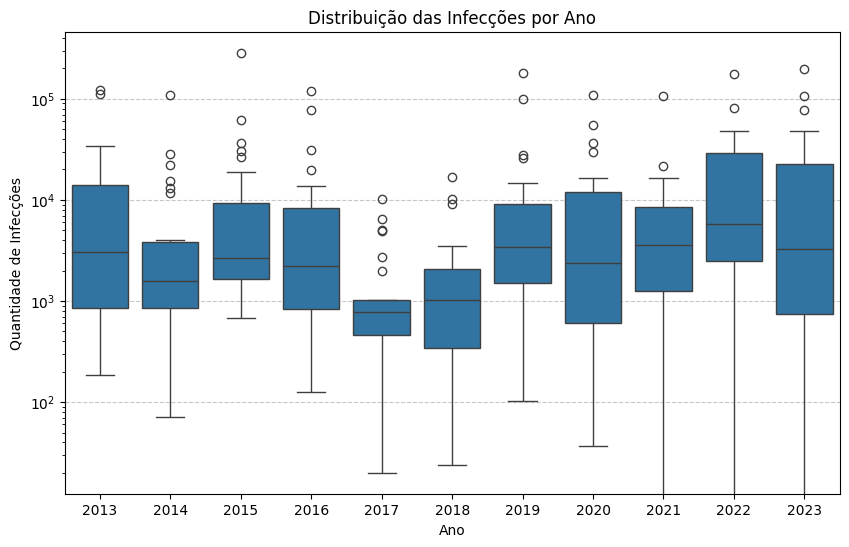

In [22]:
# Cria boxplot comparando as infecções por ano
plt.figure(figsize=(10,6))
sns.boxplot(x='ano', y='qtd_infeccoes', data=infeccoes_estado)
# Personalizações do gráfico
plt.title('Distribuição das Infecções por Ano')
plt.yscale('log')  # Usar escala logarítmica para melhor visualização
plt.xlabel('Ano')
plt.ylabel('Quantidade de Infecções')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
# Filtras os dados para o ano de 2023
infeccoes_2023 = infeccoes_estado[infeccoes_estado['ano'] == 2023]
infeccoes_2023

,ano,uf,qtd_infeccoes
270,2023,AC,1781
271,2023,AL,473
272,2023,AM,3263
273,2023,AP,742
274,2023,BA,13249
275,2023,CE,7437
276,2023,DF,23710
277,2023,ES,0
278,2023,GO,21682
279,2023,MA,2428


### Resumo do ano de 2023

In [24]:
infeccoes_2023.describe()

,ano,qtd_infeccoes
count,27.0,27.000000
mean,2023.0,22902.888889
std,0.0,43368.215001
min,2023.0,0.000000
25%,2023.0,744.000000
50%,2023.0,3263.000000
75%,2023.0,22696.000000
max,2023.0,198774.000000


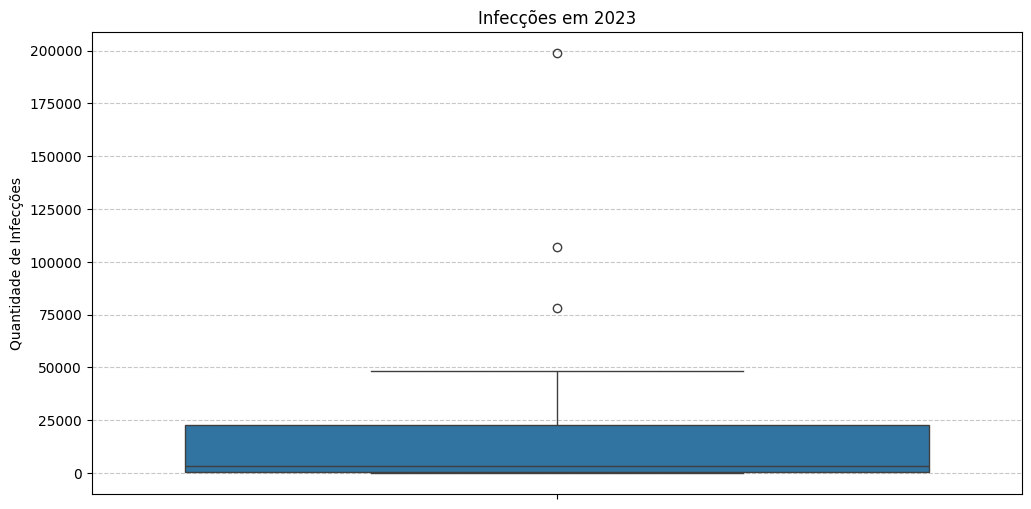

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(y='qtd_infeccoes', data=infeccoes_2023)
plt.title('Infecções em 2023')
plt.xticks
plt.ylabel('Quantidade de Infecções')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

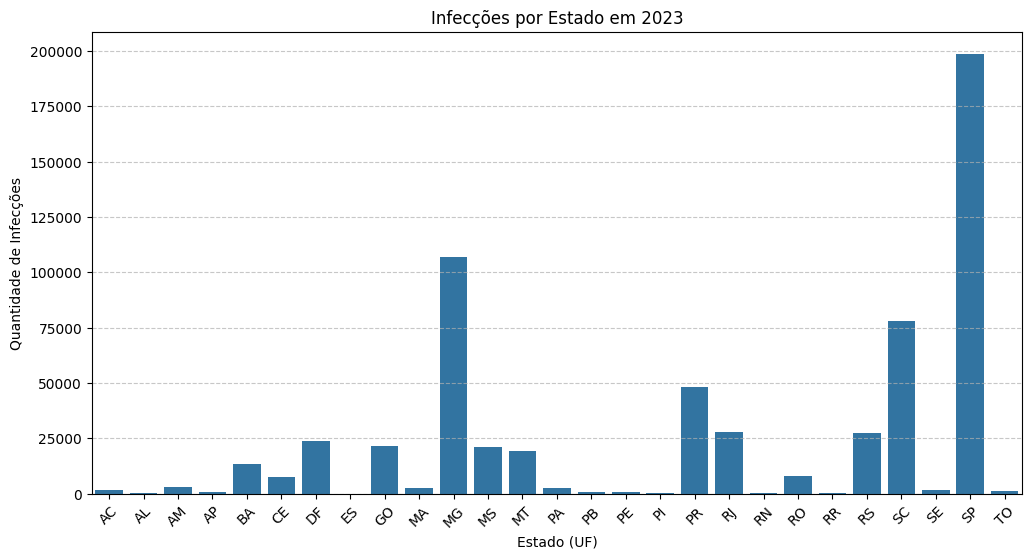

In [26]:
# utilizando o gráfico de barras para visualizar as infecções por estado em 2023
plt.figure(figsize=(12,6))  
sns.barplot(x='uf', y='qtd_infeccoes', data=infeccoes_2023)
plt.title('Infecções por Estado em 2023')
plt.xlabel('Estado (UF)')
plt.ylabel('Quantidade de Infecções') 
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

### Ordenar os dados em ordem decrescente do número de infecções 20223

In [27]:
infeccoes_estado_2023_decrescente = infeccoes_2023.sort_values(by='qtd_infeccoes', ascending=False) 

In [28]:
infeccoes_estado_2023_decrescente

,ano,uf,qtd_infeccoes
295,2023,SP,198774
280,2023,MG,106923
293,2023,SC,77954
287,2023,PR,48328
288,2023,RJ,27905
292,2023,RS,27389
276,2023,DF,23710
278,2023,GO,21682
281,2023,MS,21098
282,2023,MT,19356


### Plotando o gráfico ordenado

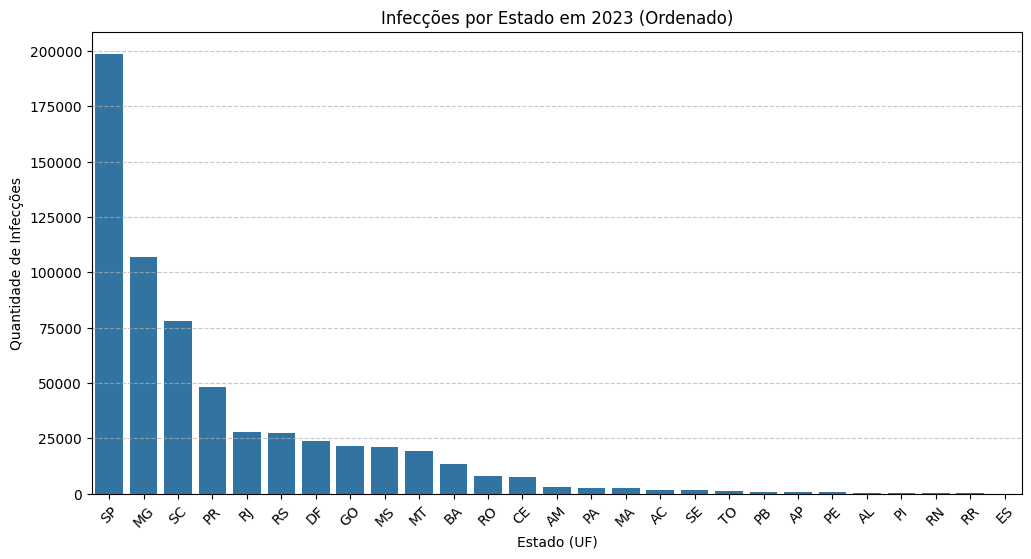

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x='uf', y='qtd_infeccoes', data=infeccoes_estado_2023_decrescente)
plt.title('Infecções por Estado em 2023 (Ordenado)')
plt.xlabel('Estado (UF)')
plt.ylabel('Quantidade de Infecções')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Construção de um gráfico de tendências por meio de disperção onde para cada estado há uma regressão linear própria da série temporal. 

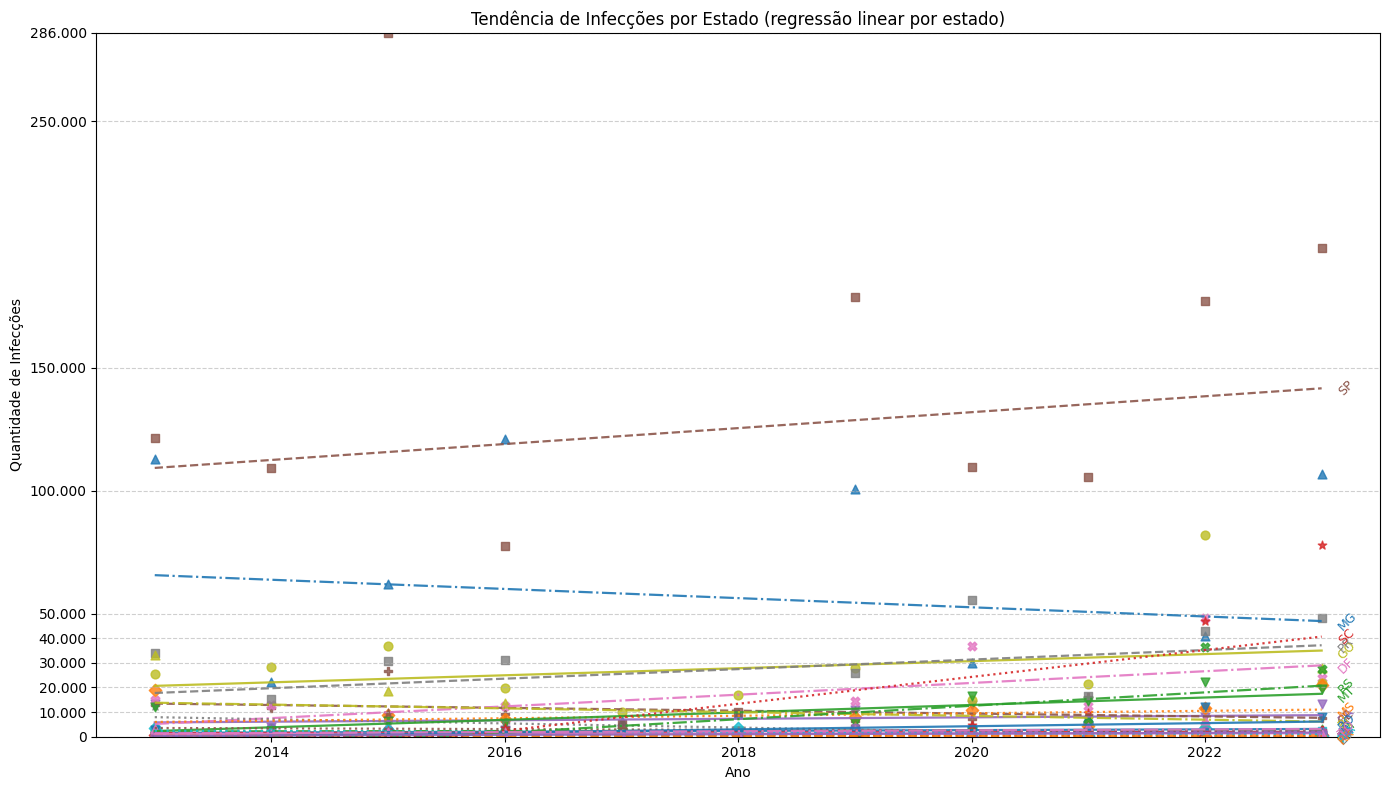

In [30]:
# Plot de tendências com regressão linear por estado e anotações finais
fig, ax = plt.subplots(figsize=(14, 8))

states = infeccoes_estado['uf'].unique()

# Paleta de cores (usa variável global se definida corretamente)
palette = globals().get('palette', None)
if palette is None or not isinstance(palette, (list, tuple)):
    palette = sns.color_palette(n_colors=len(states))
colors = palette

# Marker styles: usa variável global se existir e for válida, caso contrário define padrão
_ms = globals().get('marker_styles', None)
if isinstance(_ms, (list, tuple)):
    markers = list(_ms)
else:
    marker_styles = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']
    markers = list(marker_styles)

# Linestyles: usa variável global se existir e for válida, caso contrário define padrão
_ls = globals().get('linestyles', None)
if isinstance(_ls, (list, tuple)):
    ls_list = list(_ls)
else:
    linestyles = ['-', '--', '-.', ':']
    ls_list = list(linestyles)

max_y = int(infeccoes_estado['qtd_infeccoes'].max())
min_y = 0

for i, st in enumerate(states):
    g = infeccoes_estado[infeccoes_estado['uf'] == st].sort_values('ano')
    x = g['ano'].values
    y = g['qtd_infeccoes'].values
    # Elimina valores negativos conforme pedido
    y = np.clip(y, 0, None)
    if x.size == 0:
        continue

    # Scatter dos pontos
    ax.scatter(x, y,
               color=colors[i % len(colors)],
               marker=markers[i % len(markers)],
               s=40, alpha=0.8)

    # Ajuste linear (degree 1). Se houver poucos pontos, ainda funciona.
    try:
        m, b = np.polyfit(x, y, 1)
    except Exception:
        m, b = 0.0, np.mean(y) if y.size else 0.0

    # Linha predita (mais suave)
    x_lin = np.linspace(x.min(), x.max(), 200)
    y_lin = m * x_lin + b
    # Garante que a linha não desenhe valores negativos
    y_lin = np.clip(y_lin, 0, None)

    ax.plot(x_lin, y_lin,
            color=colors[i % len(colors)],
            linestyle=ls_list[i % len(ls_list)],
            linewidth=1.6,
            alpha=0.9)

    # Anota a sigla do estado no final da reta, rotacionada 45º
    x_label = x.max() + 0.12  # pequeno deslocamento para a direita
    y_label = float((m * x.max()) + b)
    y_label = max(0.0, y_label)  # garante não-negativo
    ax.text(x_label, y_label,
            st,
            color=colors[i % len(colors)],
            fontsize=9,
            rotation=45,
            ha='left', va='center',
            bbox=dict(boxstyle="round,pad=0.1", fc="white", ec="none", alpha=0.0))

# Ajustes do eixo Y: 0 até maior valor de y com marcações conforme solicitado
ticks = []
# 0 a 50k de 10k em 10k (mas não ultrapassa max_y)
if max_y >= 0:
    end_1 = min(50000, max_y)
    ticks.extend(list(range(0, int(end_1) + 1, 10000)))

# 50k a 150k de 50k em 50k
if max_y > 50000:
    end_2 = min(150000, max_y)
    start_2 = 50000
    ticks.extend(list(range(start_2, int(end_2) + 1, 50000)))

# 150k em diante de 100k em 100k até alcançar max_y
if max_y > 150000:
    start_3 = 150000
    ticks.extend(list(range(start_3, int(max_y) + 100000, 100000)))  # +step para incluir max_y se coincidir

# garantir inclusão do max_y como tick e remoção de duplicatas/ordenação
ticks = sorted(set(ticks))
if max_y not in ticks:
    ticks.append(max_y)
    ticks = sorted(ticks)

ax.set_yticks(ticks)
ax.set_ylim(min_y, max_y)
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de Infecções')
ax.set_title('Tendência de Infecções por Estado (regressão linear por estado)')

# Formata labels do y com separador de milhares
ax.set_yticklabels([f'{int(t):,}'.replace(',', '.') for t in ticks])

ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [32]:
# Calcula coeficientes angulares (slope) e interceptos por estado e mostra em tabela
coefs = []
for st, g in infeccoes_estado.groupby('uf'):
    x = g['ano'].values
    y = np.clip(g['qtd_infeccoes'].values, 0, None)
    if x.size < 2:
        m_val, b_val = np.nan, np.nan
    else:
        try:
            m_val, b_val = np.polyfit(x, y, 1)
        except Exception:
            m_val, b_val = np.nan, np.nan
    coefs.append((st, m_val, b_val))

# Cria DataFrame
df_coefs = pd.DataFrame(coefs, columns=['uf', 'coef_angular', 'intercepto'])

# Formatar com dois algarismos após a vírgula
df_coefs['coef_angular'] = df_coefs['coef_angular'].round(2)

# Selecionar apenas as duas colunas e ordenar de forma decrescente
df_coefs = df_coefs[['uf', 'coef_angular']].sort_values(by='coef_angular', ascending=False).reset_index(drop=True)

df_coefs


,uf,coef_angular
0,SC,5461.16
1,SP,3234.60
2,RS,2724.45
3,DF,2380.85
4,PR,1938.75
5,MT,1513.57
6,GO,1434.91
7,RO,635.67
8,MS,502.93
9,BA,294.45
